### **Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow**

**Computer Vision** is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing a car in front.

### **Get the data**

In [2]:
import zipfile

# Unzip
zip_ref = zipfile.ZipFile('data/pizza_steak.zip')
zip_ref.extractall('data')
zip_ref.close()

### **Inspect the data**

A very crucial step at the beggining of every ML project is becoming one with the data. And for Computer Vision it usually means visualising many samples of your data.

In [3]:
import os
os.listdir('data/pizza_steak')

['test', 'train']

In [4]:
os.listdir('data/pizza_steak/train')

['pizza', 'steak']

In [5]:
os.listdir('data/pizza_steak/train/steak')[:5]

['1000205.jpg', '100135.jpg', '101312.jpg', '1021458.jpg', '1032846.jpg']

In [6]:
# Walk through pizza_stead directory and list number of files

for dirpath, dirnames, filenames in os.walk('data/pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in data/pizza_steak.
There are 2 directories and 0 images in data/pizza_steak\test.
There are 0 directories and 250 images in data/pizza_steak\test\pizza.
There are 0 directories and 250 images in data/pizza_steak\test\steak.
There are 2 directories and 0 images in data/pizza_steak\train.
There are 0 directories and 750 images in data/pizza_steak\train\pizza.
There are 0 directories and 750 images in data/pizza_steak\train\steak.


In [7]:
num_steak_images_train = len(os.listdir('data/pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images first let's get the class names programmatically.

In [8]:
# Get the class names programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path('data/pizza_steak/train')
# Create a list of class names for the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder = target_dir + '/' + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    # Show the shape of the image
    print(f'Image shape: {img.shape}') 

    return img

['2622336.jpg']
Image shape: (512, 512, 3)


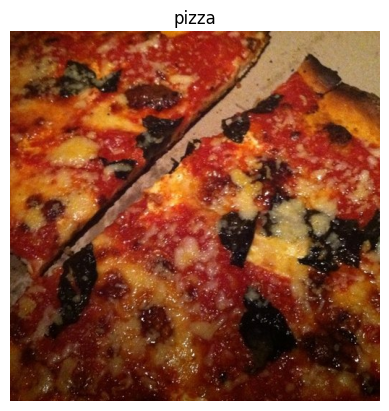

In [59]:
# View a random image from the training dataset
img = view_random_image(target_dir='data/pizza_steak/train',
                        target_class='pizza')

In [11]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[22, 26, 27],
        [26, 30, 31],
        [28, 33, 36],
        ...,
        [ 1,  6,  2],
        [ 1,  6,  2],
        [ 1,  6,  2]],

       [[25, 29, 30],
        [25, 29, 30],
        [26, 31, 34],
        ...,
        [ 1,  6,  2],
        [ 1,  6,  2],
        [ 1,  6,  2]],

       [[26, 30, 31],
        [25, 29, 30],
        [23, 28, 31],
        ...,
        [ 1,  6,  2],
        [ 1,  6,  2],
        [ 2,  7,  3]],

       ...,

       [[ 7, 12, 16],
        [ 8, 13, 17],
        [ 8, 13, 17],
        ...,
        [18, 28, 30],
        [17, 27, 29],
        [17, 27, 29]],

       [[ 7, 12, 16],
        [ 8, 13, 17],
        [ 8, 13, 17],
        ...,
        [17, 27, 29],
        [16, 26, 28],
        [16, 26, 28]],

       [[ 7, 12, 16],
        [ 7, 12, 16],
        [ 8, 13, 17],
        ...,
        [16, 26, 28],
        [15, 25, 27],
        [15, 25, 27]]], dtype=uint8)>

In [12]:
img.shape # retuns (width, height, colour channels)

(512, 512, 3)

### **Data preprocessing**

**Normalization**

In [13]:
img/225.0

array([[[0.09777778, 0.11555556, 0.12      ],
        [0.11555556, 0.13333333, 0.13777778],
        [0.12444444, 0.14666667, 0.16      ],
        ...,
        [0.00444444, 0.02666667, 0.00888889],
        [0.00444444, 0.02666667, 0.00888889],
        [0.00444444, 0.02666667, 0.00888889]],

       [[0.11111111, 0.12888889, 0.13333333],
        [0.11111111, 0.12888889, 0.13333333],
        [0.11555556, 0.13777778, 0.15111111],
        ...,
        [0.00444444, 0.02666667, 0.00888889],
        [0.00444444, 0.02666667, 0.00888889],
        [0.00444444, 0.02666667, 0.00888889]],

       [[0.11555556, 0.13333333, 0.13777778],
        [0.11111111, 0.12888889, 0.13333333],
        [0.10222222, 0.12444444, 0.13777778],
        ...,
        [0.00444444, 0.02666667, 0.00888889],
        [0.00444444, 0.02666667, 0.00888889],
        [0.00888889, 0.03111111, 0.01333333]],

       ...,

       [[0.03111111, 0.05333333, 0.07111111],
        [0.03555556, 0.05777778, 0.07555556],
        [0.03555556, 0

### **An end-to-end example**

Let's build a Convolutional Neural Network to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns 
* Compile a CNN
* Fit a CNN to the training data

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1 - normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = 'data/pizza_steak/train'
test_dir = 'data/pizza_steak/train'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# # Build a CNN model
# model_1 = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=10, 
#                            kernel_size=3,
#                            activation='relu',
#                            input_shape=(224, 224, 3)),
#     tf.keras.layers.Conv2D(10, 3, activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=2,
#                               padding='valid'),
#     tf.keras.layers.Conv2D(10, 3, activation='relu'),
#     tf.keras.layers.Conv2D(10, 3, activation='relu'),
#     tf.keras.layers.MaxPool2D(2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile a CNN
# model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=['accuracy'])

# history_1 = model_1.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [15]:
#model_1.summary()

### **Save a model**

In [16]:
#model_1.save('saved_models/cnn_model_1')

### **Load a model**

In [17]:
# Load a model_1
model_1 = tf.keras.models.load_model('saved_models/cnn_model_1')

# Get a summary of a model_1
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [18]:
# Evaluate model_1
model_1.evaluate(train_data)

47/47 [==============================] - 14s 287ms/step - loss: 0.2492 - accuracy: 0.9120


[0.2492406666278839, 0.9120000004768372]

### **Using the same model as before to compare the results**

Let's replicate the model we've built in a previous section to see if it works with our image data.

In [19]:
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile a model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit a model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=(len(valid_data)))

Epoch 1/5
47/47 [==============================] - 6s 128ms/step - loss: 0.9962 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [20]:
# Get a summary of model_2
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than CNN (model_1), model_2 performs terribly...it's basicall guessing.

In [21]:
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile a model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit a model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 5.0434 - accuracy: 0.6093 - val_loss: 0.5210 - val_accuracy: 0.7873
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.7305 - accuracy: 0.7153 - val_loss: 0.4392 - val_accuracy: 0.8113
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.7481 - accuracy: 0.7200 - val_loss: 0.5530 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.9009 - accuracy: 0.6993 - val_loss: 0.7658 - val_accuracy: 0.7547
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.5362 - accuracy: 0.7860 - val_loss: 0.3481 - val_accuracy: 0.8600


In [22]:
# Get a  summary of model_3
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


 🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better and in most cases  it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible trainable parameters, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there is less trainable in a convolutional neural network, these are often more helpful in deciphering between different **features** in an image.

## **Binary Classifiaction: Let's break it down**

1. **Become on with the data** (visualize, visualize, visualize)
2. **Preprocess the data** (prepare it for the model, the main step was scaling/normalizing & turning data into batches)
3. **Create a model** (start with a baseline)
4. **Fit the model**
5. **Evaluate a model**
6. **Adjust different parameters and improve the model** (try to beat the baseline)
7. **Repeat until satisfied** (experiment, experiment, experiment)

### **1. Become one with the data**

['168006.jpg']
Image shape: (512, 382, 3)
['898303.jpg']
Image shape: (512, 512, 3)


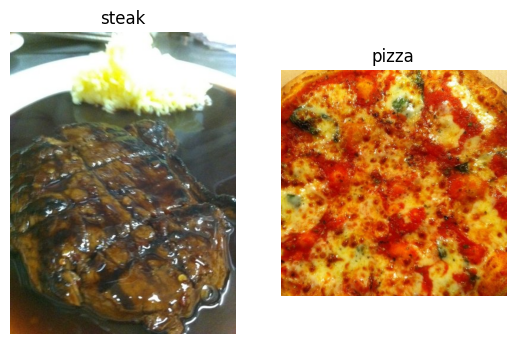

In [84]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('data/pizza_steak/train', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('data/pizza_steak/train', 'pizza')

### **2. Preprocess the data**

In [85]:
# Define directory dataset paths

train_dir = 'data/pizza_steak/train'
test_dir = 'data/pizza_steak/test'

Next step is to turn data into **batches**.

A batch is a small subset of data. Rather than look at all images at one time, a model might only look at 32 at a time.

It does this for a couple of resaons:
1. Too many images might not fit into the memory of GPU.
2. Trying to learn patterns in too many images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health...and **Yann LeCun** said so.

In [86]:
# Create train a test data generatios and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [87]:
# Load in images from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory for images
                                               target_size=(224, 224), # target size of images (height, width)
                                               class_mode='binary', # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [88]:
# Get a saple of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [89]:
# How many batches are there?
len(train_data)

47

In [90]:
# Get the first two images
images[0], images[0].shape

(array([[[0.21568629, 0.16862746, 0.07450981],
         [0.21176472, 0.16862746, 0.09019608],
         [0.20000002, 0.16470589, 0.09803922],
         ...,
         [0.03137255, 0.        , 0.        ],
         [0.03137255, 0.        , 0.        ],
         [0.03137255, 0.        , 0.        ]],
 
        [[0.21176472, 0.16470589, 0.07058824],
         [0.22352943, 0.18039216, 0.10196079],
         [0.21176472, 0.1764706 , 0.10980393],
         ...,
         [0.03137255, 0.        , 0.        ],
         [0.03137255, 0.        , 0.        ],
         [0.03137255, 0.        , 0.        ]],
 
        [[0.19215688, 0.15294118, 0.05490196],
         [0.21960786, 0.18823531, 0.09803922],
         [0.21960786, 0.18823531, 0.1137255 ],
         ...,
         [0.03137255, 0.        , 0.        ],
         [0.03137255, 0.        , 0.        ],
         [0.03137255, 0.        , 0.        ]],
 
        ...,
 
        [[0.05882353, 0.00392157, 0.        ],
         [0.06666667, 0.00784314, 0.     

In [91]:
# View the first batch of labels
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

### **3. Create a CNN model (start with a baseline)**

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

🔑 **Note:** In deep learning, there is almost infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [92]:
# Make the creating of our model a little easier
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
# from tensorflow.keras.models import Sequential

In [93]:
# Create the model (this will be our baseline, a 3 layer convolutional neural network)
tf.random.set_seed(42)

model_4 = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Conv2D(filters=10, # filters is the number of sliding windows going across an input (higher = more complex model)
                           kernel_size=(3, 3), # the size of the sliding window going across an input
                           strides=(1, 1), # the size of the step the sliding window takes across an input
                           padding='valid', # if 'same', output shape is same as input shape if 'valid', output shape gest compressed
                           activation='relu',
                           input_shape=(224, 224, 3)), 
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'), # this layer is the same as the one above
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid') # output layer (working with binary classification so only one output neuron)
])

### **Breakdown of Conv2D layer**

**Example code:** tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), padding='same')

**Example code 2 (same as above):** tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding='same')

**Example code 3 (same as above):** tf.keras.layers.Conv2D(10, 3, 1, 'same')


| **Hyperparameter Name** | **What does it do?** | **Typical values**
| :------------: | :-------:  | :-------:  |
| **Filters** | Decides how many filters should pass over an <br> input tensor (e.g. sliding windows over an <br> image). | 10, 32, 64, 128 (higher values lead to more <br> complex models)
| **Kernel size <br> (also called filter size)** | Determines the shape of the filters (sliding <br> windows) over the output. | 3, 5, 7 (lower values learn smaller features, <br> higher values learn larger features)
| **Padding** | Pads the target tensor with zeros (if "same") <br> to preserve input shape, or leaves in the <br> target tensor as it is (if 'valid), lowering <br> output shape. | 'same' or 'valid'
| **Strides** | The number of steps a filter takes across an <br> image at a time (e.g. if *strides*=1, a filter <br> moves across an image 1 pixel at a time). | 1 (default), 2

📖 **Resource:** For an interactive demonstration of the above hyperparameters, see the [CNN explainer website](https://poloclub.github.io/cnn-explainer/).

In [94]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [95]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_5 (Flatten)         (None, 475240)            0         
                                                                 
 dense_10 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### **4. Fit the model**

In [96]:
# Check the lengths (in batches) of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [97]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 52s 1s/step - loss: 0.9221 - accuracy: 0.6833 - val_loss: 0.4899 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 55s 1s/step - loss: 0.4335 - accuracy: 0.8120 - val_loss: 0.3585 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 54s 1s/step - loss: 0.3370 - accuracy: 0.8647 - val_loss: 0.3543 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 55s 1s/step - loss: 0.2305 - accuracy: 0.9167 - val_loss: 0.3945 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 56s 1s/step - loss: 0.1439 - accuracy: 0.9613 - val_loss: 0.3963 - val_accuracy: 0.8260


### **5. Evaluating the model**

It looks like the model is learning something, let's evaluate it.

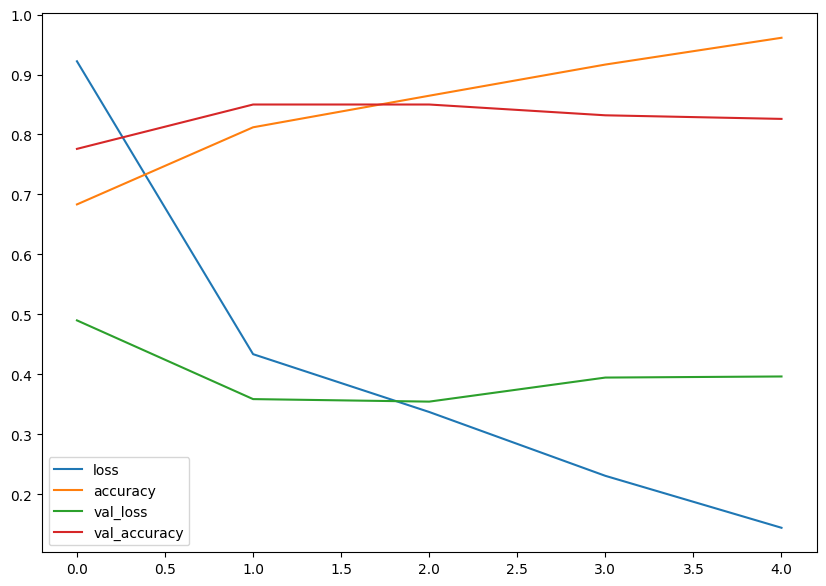

In [98]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [101]:
# Plot the validatio and training curves separately
def plot_loss_curves(history):
    '''
    Returns sepatrate loss curves for training and validation metrics
    '''
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # how many epochs did we run for

    # Plot loss
    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that model is **overfitting** the training dataset. This means it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

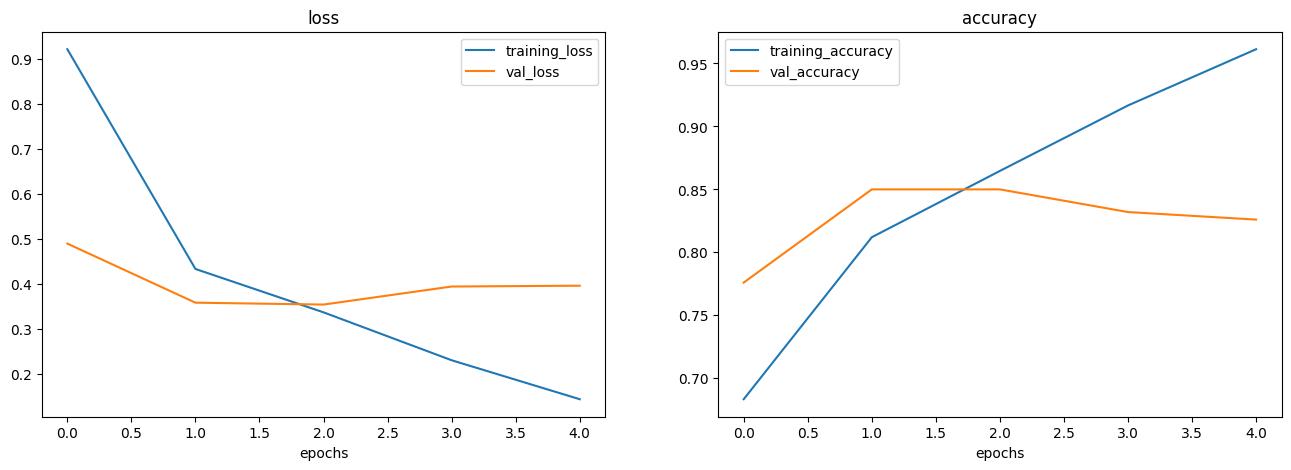

In [103]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other

### **6. Adjust the model parameters**

Fitting a machine learning model comes in 3 steps:
1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:
* Increas the number of conv layers
* Increate the number of conv filters
* Add another dense layer to the output of the flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [110]:
# Create the model (new baseline with MaxPool2D layer)
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [111]:
# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [112]:
history_5 = model_5.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 18s 373ms/step - loss: 0.5843 - accuracy: 0.6880 - val_loss: 0.4606 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 16s 346ms/step - loss: 0.4670 - accuracy: 0.7880 - val_loss: 0.4143 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 17s 364ms/step - loss: 0.4267 - accuracy: 0.8113 - val_loss: 0.3750 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 19s 413ms/step - loss: 0.4162 - accuracy: 0.8100 - val_loss: 0.3690 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4028 - accuracy: 0.8220 - val_loss: 0.3396 - val_accuracy: 0.8540


In [116]:
model_5.evaluate(test_data)

16/16 [==============================] - 2s 105ms/step - loss: 0.3396 - accuracy: 0.8540


[0.3395543098449707, 0.8539999723434448]

In [113]:
# Get a summary of a model with max pooling
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 10)      

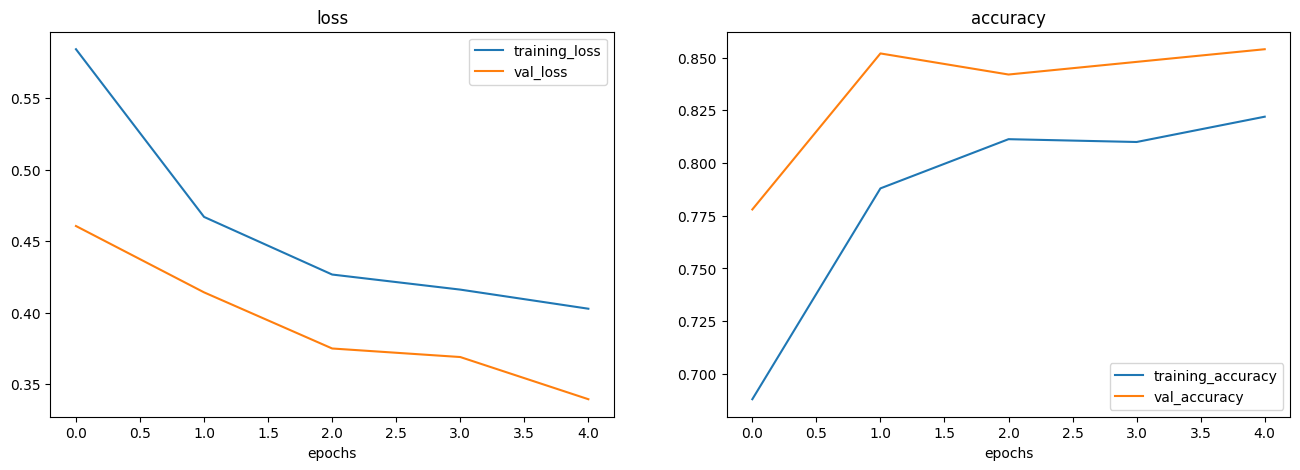

In [115]:
# Plot loss curves
plot_loss_curves(history_5)